In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [2]:
df = pd.read_csv("bitcoin_data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(4857377, 8)

In [4]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [5]:
print(df.shape, df_month.shape, df_year.shape, df_Q.shape)

(3379, 8) (112, 8) (11, 8) (38, 8)


In [6]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31,2011-12-31 15:55:30,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,2012-01-01 11:59:30,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,2012-01-02 11:59:30,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,2012-01-03 11:59:30,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,2012-01-04 11:59:30,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [7]:
df = df.dropna(how="any")

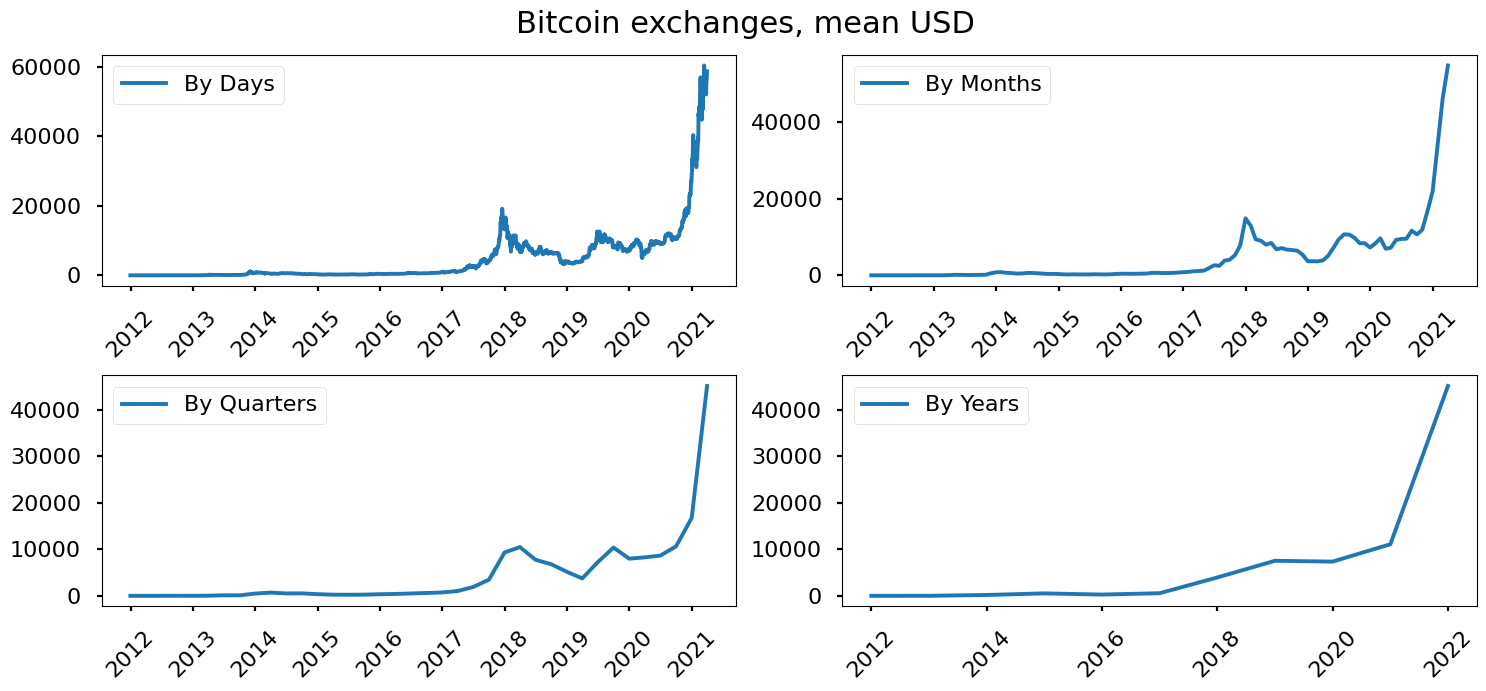

In [8]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.xticks(rotation = 45)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.xticks(rotation = 45)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.xticks(rotation = 45)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.xticks(rotation = 45)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()
fig.tight_layout()
plt.show()

In [9]:
# We can also you diff function provided by pandas to find out 
# seasonality trends.

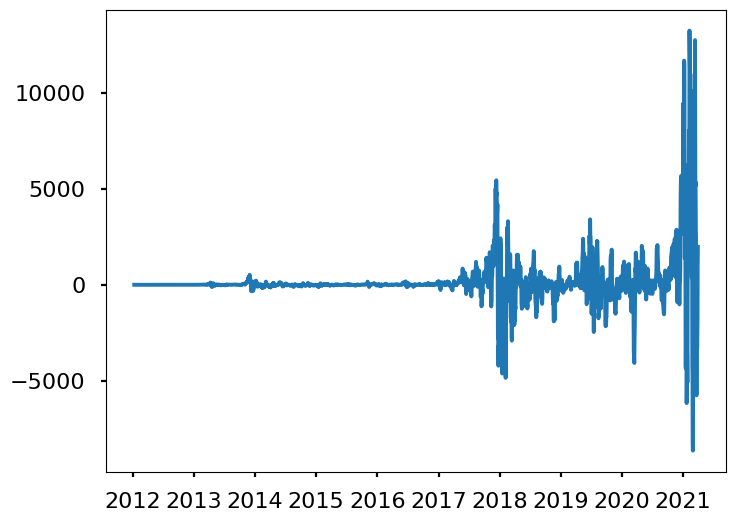

In [10]:
# Jan 2012 to March 2021
plt.figure(figsize=(8, 6))
plt.plot(df["Weighted_Price"].diff(periods=9)) # checking for yearly seasonality

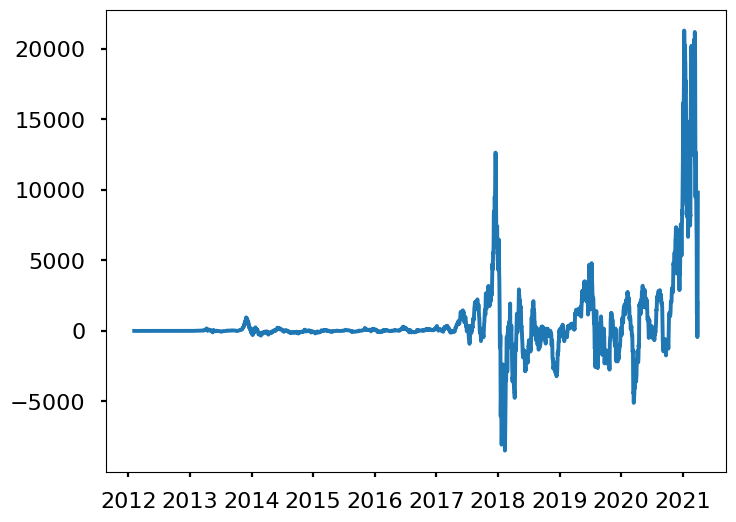

In [11]:
# Zooming in
plt.figure(figsize=(8, 6))
plt.plot(df["Weighted_Price"].diff(periods=9*4)) # quarterly

In [12]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Weighted_Price)[1])

Dickey–Fuller test: p=1.000000


In [13]:
# Well the series is not stationary, so we apply boxcox transformation

df['Weighted_Price_box'], lmbda = stats.boxcox(df.Weighted_Price)
# df['Weighted_Price_box'] = stats.boxcox(df.Weighted_Price, lmbda=0.04)
# just rying out different values
print(f"Dickey–Fuller test: p={sm.tsa.stattools.adfuller(df.Weighted_Price_box)[1]}")

Dickey–Fuller test: p=0.9509659037414343


In [14]:
print(lmbda)

0.11429085883903295


In [16]:
# Seasonal differentiation (weekly seasonality)
df['prices_box_diff_1'] = df.Weighted_Price_box - df.Weighted_Price_box.shift(7)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.prices_box_diff_1[7:])[1])

Dickey–Fuller test: p=0.000000
